In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
d2=pd.read_csv('sonar.csv')
d2.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [5]:
d2.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

In [6]:
#therefore there are no nan values

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
d2['Class']=le.fit_transform(d2['Class'])

In [9]:
d2.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [10]:
d2.Class.value_counts()

0    111
1     97
Name: Class, dtype: int64

In [11]:
#0->Rock  ,1-> mine ,therefore there are 111 rock datas and 97 mine datas

In [12]:
d2.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [13]:
#there is no greater difference between 75% and max,that means there is only less chance for the presence of outliers

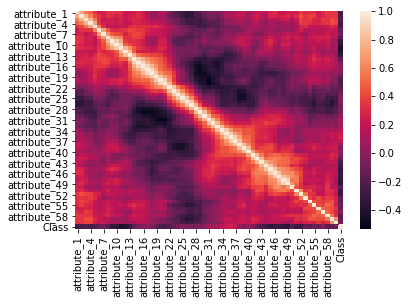

In [14]:
d2cor=d2.corr()
sns.heatmap(d2cor)

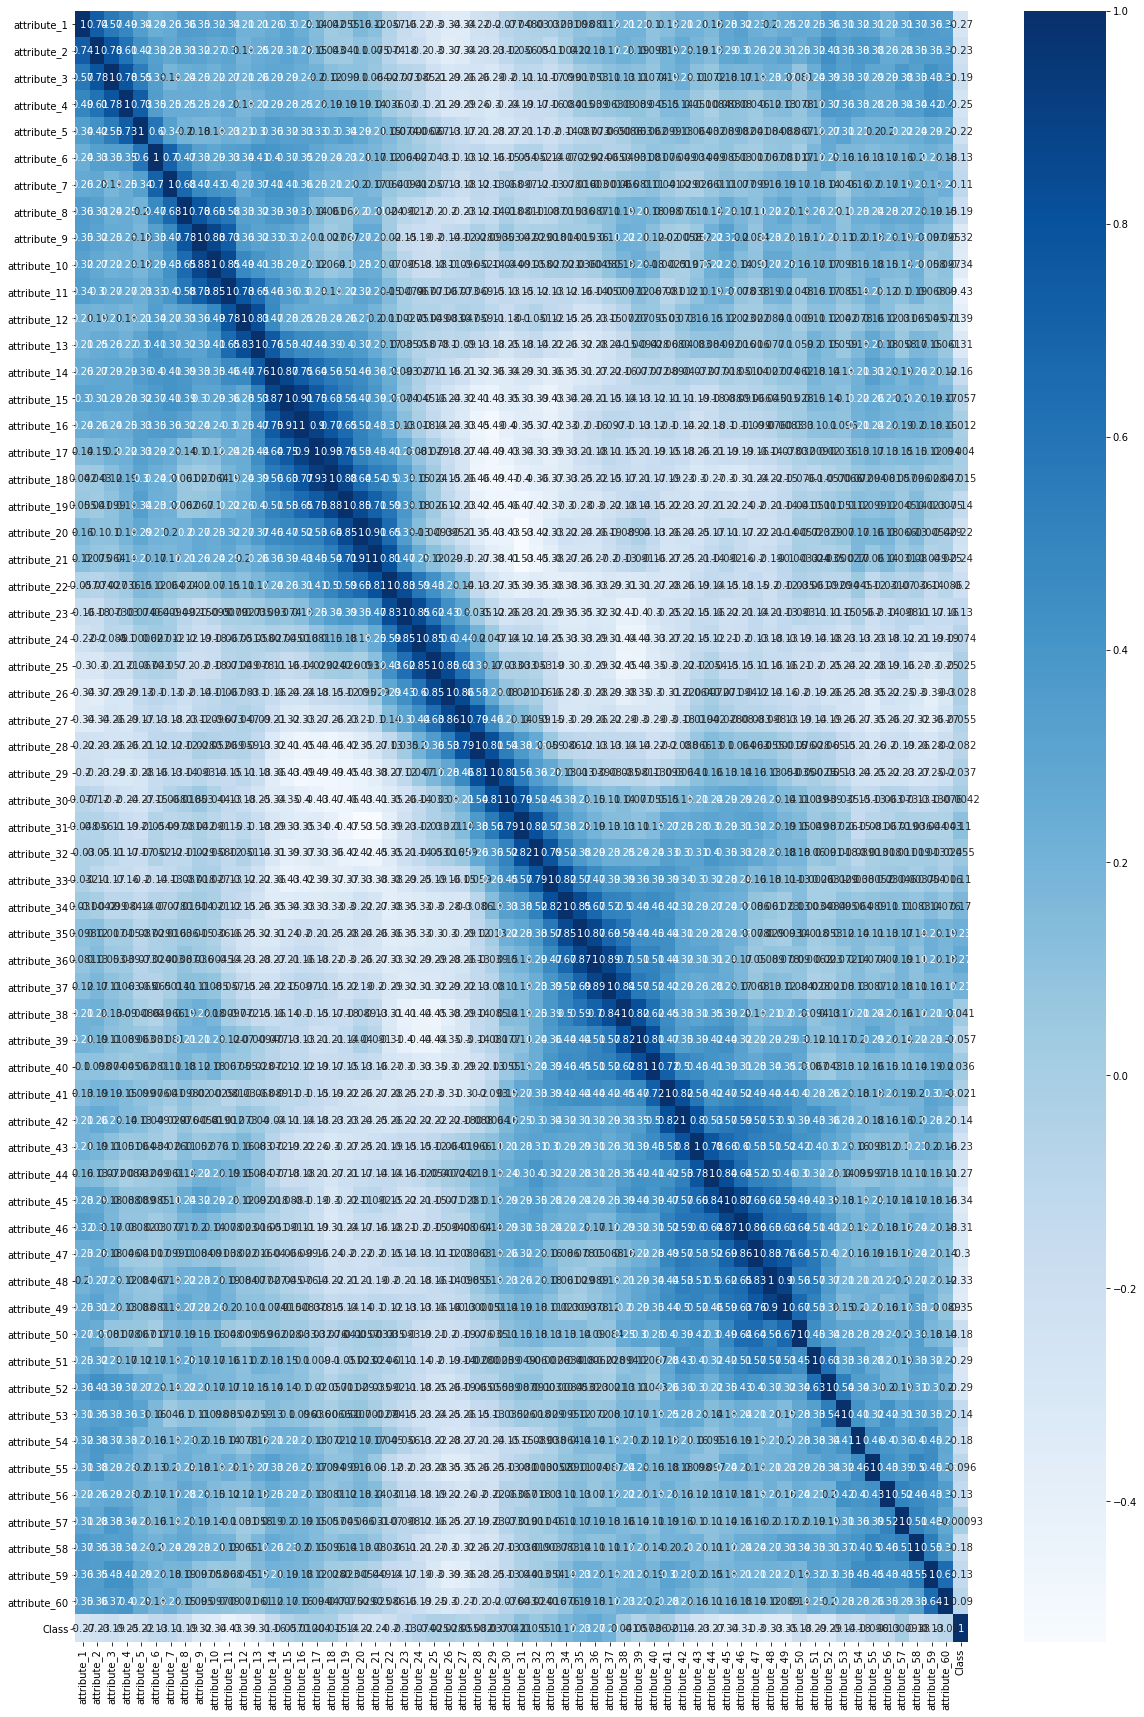

In [15]:
plt.figure(figsize=(20,30))
sns.heatmap(d2cor,cmap='Blues',annot=True)

In [16]:
collist=d2.columns.values
ncol=30
nrows=10

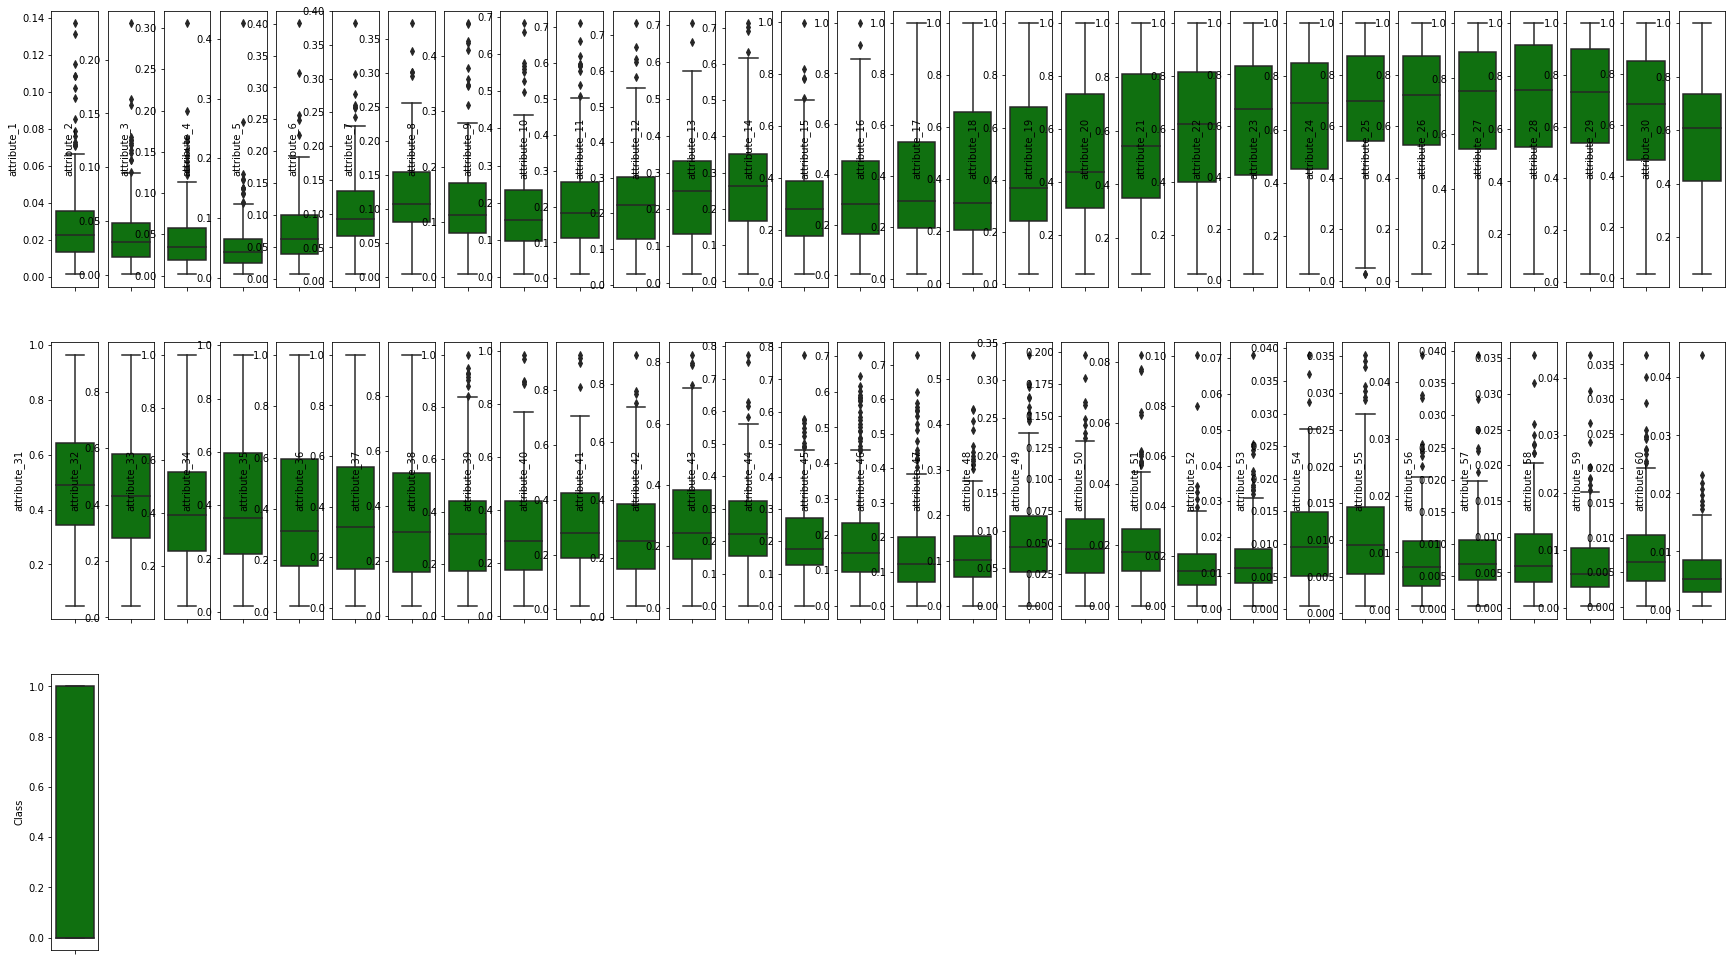

In [17]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d2[collist[i]],color='green',orient='v')

In [18]:
d2.skew()

attribute_1     2.131088
attribute_2     2.155644
attribute_3     2.652518
attribute_4     3.401697
attribute_5     2.018141
                  ...   
attribute_57    1.653090
attribute_58    2.098330
attribute_59    1.737506
attribute_60    2.775754
Class           0.135903
Length: 61, dtype: float64

In [19]:
import numpy as np
for col in d2.columns:
    if d2.skew().loc[col]>0.55:
        d2[col]=np.log1p(d2[col])
    

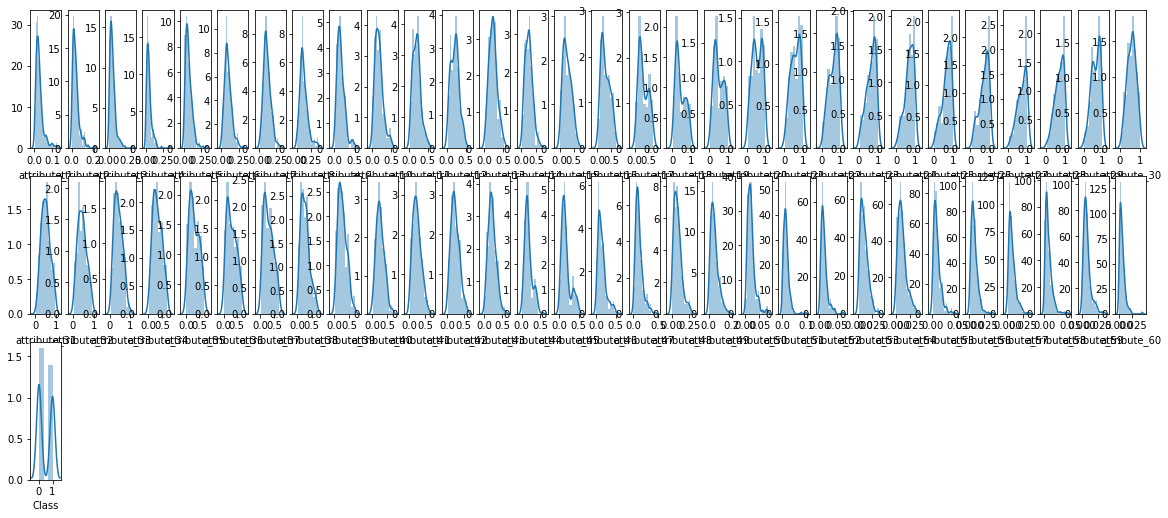

In [20]:
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d2[collist[i]])

In [21]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d2))
z

array([[0.39934994, 0.02628801, 0.01002797, ..., 0.17553562, 0.66199906,
        1.06973356],
       [0.72491103, 0.44765863, 1.09908051, ..., 0.44442557, 0.42064156,
        1.06973356],
       [0.12128069, 0.6297828 , 1.76227694, ..., 0.25693559, 0.26164196,
        1.06973356],
       ...,
       [1.02680659, 0.1803522 , 0.69409005, ..., 0.03629322, 0.68212522,
        0.93481221],
       [0.06168251, 0.08287269, 0.15844551, ..., 0.70616332, 0.34025313,
        0.93481221],
       [0.13022441, 0.05142462, 0.81719454, ..., 0.29738111, 1.00151646,
        0.93481221]])

In [22]:
threshold=3
print(np.where(z>3))

(array([  2,   2,  19,  19,  20,  22,  22,  22,  22,  22,  22,  33,  44,
        44,  65,  85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,
        98,  98, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 135, 135, 135, 135,
       136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140, 140,
       141, 142, 142, 142, 143, 143, 144, 145, 145, 146, 146, 146, 146,
       146, 146, 146, 147, 147, 147, 147, 147, 147, 147, 186, 186, 186],
      dtype=int64), array([ 8, 56,  4,  7,  5, 39, 40, 46, 47, 48, 49, 49, 42, 43, 58,  1,  2,
       56,  5,  6, 58, 59,  0,  1,  2,  3,  4, 59, 57, 55,  2,  3,  4, 57,
       13, 54, 57,  0, 53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  7,  8, 53,
       55,  0,  7,  8, 51,  9, 10,  2, 47, 51, 46, 48, 49, 50, 59, 53, 54,
       58, 45, 51, 51,  1, 49,  0, 42, 45, 46, 47, 50, 51,  4, 49, 52, 54,
       55, 56, 57, 44, 45, 46], dtype=int64))


In [23]:
d2_new=d2[(z<3).all(axis=1)]
print(d2.shape)
print(d2_new.shape)

(208, 61)
(173, 61)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
x=d2.iloc[:,:-1]
x

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.022935,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
2,0.025863,0.056569,0.104270,0.102827,0.092944,0.205387,0.217608,0.319980,0.444558,0.482056,...,0.003295,0.022935,0.016464,0.009455,0.017840,0.024107,0.031111,0.016267,0.009455,0.007770
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.023814,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.184652,0.156491,0.209288,0.237756,...,0.020097,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.094401,0.096945,0.098034,0.195073,...,0.005087,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.118405,0.111362,0.118494,0.225461,...,0.015381,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.136714,0.106430,0.177728,0.211395,...,0.004191,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789


In [26]:
y=d2.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: Class, Length: 208, dtype: int32

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.39934994, -0.02628801, -0.01002797, ...,  0.07350779,
         0.17553562, -0.66199906],
       [ 0.72491103,  0.44765863,  1.09908051, ..., -0.47303305,
        -0.44442557, -0.42064156],
       [-0.12128069,  0.6297828 ,  1.76227694, ...,  1.31565406,
         0.25693559,  0.26164196],
       ...,
       [ 1.02680659,  0.1803522 , -0.69409005, ...,  0.91303216,
        -0.03629322, -0.68212522],
       [ 0.06168251, -0.08287269,  0.15844551, ..., -0.00445323,
        -0.70616332, -0.34025313],
       [-0.13022441, -0.05142462, -0.81719454, ..., -0.67651889,
        -0.29738111,  1.00151646]])

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7608695652173914
[[20  7]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.68      0.79      0.73        19

    accuracy                           0.76        46
   macro avg       0.76      0.77      0.76        46
weighted avg       0.77      0.76      0.76        46



In [31]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [32]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([7.03598894e-03, 9.48809005e-01, 3.63030923e-01, 9.51285579e-01,
       8.48409606e-02, 2.60781577e-01, 2.41686198e-01, 3.52277274e-02,
       9.90687066e-01, 6.50759639e-01, 2.77651701e-03, 7.92399034e-01,
       6.51062029e-01, 1.53125199e-04, 1.26096966e-01, 1.16432405e-02,
       1.19870868e-01, 2.04423090e-01, 3.82636475e-01, 7.40082887e-01,
       5.21546891e-02, 1.44335261e-01, 7.05522426e-01, 7.88429381e-02,
       9.97725453e-01, 5.90647630e-01, 9.89476710e-01, 9.74031721e-01,
       7.46001366e-05, 2.13394074e-04, 7.88298789e-01, 7.24803675e-01,
       9.99383803e-01, 4.75504467e-02, 4.49239321e-06, 6.78607604e-04,
       8.72518354e-05, 5.24875319e-01, 8.82649213e-01, 8.85962686e-01,
       9.98698362e-01, 9.11584780e-01, 9.77634099e-01, 1.36020388e-03,
       9.99615985e-01, 2.11423750e-01])

In [47]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [48]:
fpr

array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
       0.11111111, 0.11111111, 0.22222222, 0.22222222, 0.25925926,
       0.25925926, 0.2962963 , 0.2962963 , 1.        ])

In [49]:
tpr

array([0.        , 0.05263158, 0.52631579, 0.52631579, 0.63157895,
       0.63157895, 0.73684211, 0.73684211, 0.78947368, 0.78947368,
       0.94736842, 0.94736842, 1.        , 1.        ])

In [50]:
thresholds

array([1.99961599e+00, 9.99615985e-01, 9.48809005e-01, 8.85962686e-01,
       7.92399034e-01, 7.88298789e-01, 7.24803675e-01, 6.50759639e-01,
       5.90647630e-01, 5.24875319e-01, 2.60781577e-01, 2.41686198e-01,
       2.11423750e-01, 4.49239321e-06])

<function matplotlib.pyplot.show(*args, **kw)>

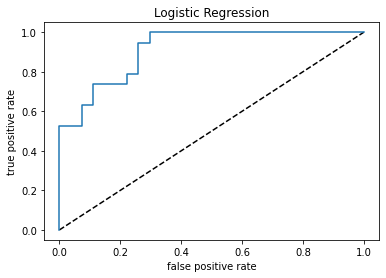

In [51]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [52]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7651072124756335


In [34]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7608695652173914
[[18  9]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.65      0.89      0.76        19

    accuracy                           0.76        46
   macro avg       0.78      0.78      0.76        46
weighted avg       0.80      0.76      0.76        46



In [35]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8913043478260869
[[23  4]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.82      0.95      0.88        19

    accuracy                           0.89        46
   macro avg       0.89      0.90      0.89        46
weighted avg       0.90      0.89      0.89        46



In [36]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8913043478260869
[[24  3]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.85      0.89      0.87        19

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



In [37]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8913043478260869
[[24  3]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.85      0.89      0.87        19

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



In [38]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6956521739130435
[[18  9]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.61      0.74      0.67        19

    accuracy                           0.70        46
   macro avg       0.70      0.70      0.69        46
weighted avg       0.71      0.70      0.70        46



<function matplotlib.pyplot.show(*args, **kw)>

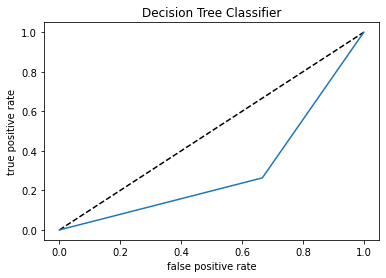

In [53]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [54]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7651072124756335


In [39]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8695652173913043
[[23  4]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.81      0.89      0.85        19

    accuracy                           0.87        46
   macro avg       0.86      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46



In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.35714286 0.66666667 0.66666667 0.7804878  0.63414634]
0.6210220673635308 0.1409969251363108


In [42]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.64285714 0.88095238 0.73809524 0.73170732 0.19512195]
0.637746806039489 0.23408981813195703


In [43]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.5        0.73809524 0.64285714 0.70731707 0.46341463]
0.6103368176538908 0.11004117124214831


In [44]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.54761905 0.69047619 0.61904762 0.7804878  0.70731707]
0.6689895470383276 0.07948274140675254


In [45]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.54761905 0.64285714 0.57142857 0.73170732 0.31707317]
0.562137049941928 0.13829187868544376


In [55]:
import joblib
joblib.dump(dtc,'dtc_sonar.pkl')

['dtc_sonar.pkl']